# Demonstration of density 3Dto2D

Demonstrates the summation of 2D slices of a 3D target density distribution. Slices are perpedicular to an "X-ray" that travels through the target at an angle of 45 degrees to the target-aligned coordinates. The target density distribution is a homogenous slab.

In [1]:
# import packages
import numpy as np
from matplotlib import pyplot as plt
from scipy import special

# append path for loading own packages
import sys
sys.path.append("../packages")

# switch on inline plotting
%matplotlib inline

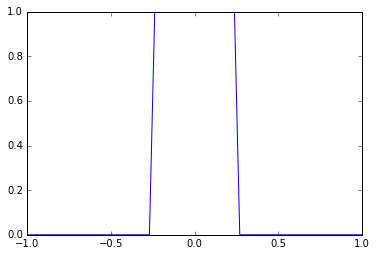

In [3]:
# import own package auxiliary
import auxiliary as aux

# density distribution
def f(xp, yp, zp):
    """
    Density distribution in target coordinates.
    """
    return aux.theta(xp + 0.25) * aux.theta(-xp + 0.25)

x_test = np.linspace(-1., 1., 64)

plt.plot(x_test, f(x_test, 0, 0))

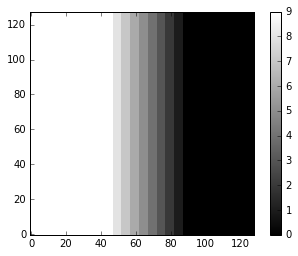

In [10]:
# define axis coordinate arrays
zpmin = 0.
zpmax = 10.
zpres = 128
zp = np.linspace(zpmin, zpmax, zpres, endpoint=False)

xpmin = -1.
xpmax = 1.
xpres = 128
xp = np.linspace(xpmin, xpmax, xpres, endpoint=False)

ypmin = -1.
ypmax = 1.
ypres = xres
yp = np.linspace(ypmin, ypmax, ypres, endpoint=False)

# make 2D grids from x and y (1D-)arrays
xx, yy = np.meshgrid(x, y)

# initialize 
D = np.zeros(shape=xx.shape)

def helper(D, z):
    for zpos in z:
        xp, yp, zp = rcoords2tcoords(xx, yy, zpos*np.ones(shape=xx.shape))
        D += f(xp, yp, zp)

%prun helper(D, z)

aux.imshow(D)
plt.colorbar()

### Running time (cell above)

zres = 4
xres = yres = 1024
-> ca. 35 sec

-----

zres = 4
xres = yres = 512
-> ca. 9 sec

-----

zres = 256
xres = yres = 256
-> ca. 2,5 min